In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

In [13]:
testtimes = [7, 15, 30]
testdists = [9, 40, 200]
datatimes = [54, 70, 82, 75]
datadists = [239, 1142, 1295, 1253]
testinpdf = pd.DataFrame({'t_tot': testtimes, 'recdist': testdists})
datainpdf = pd.DataFrame({'t_tot': datatimes, 'recdist': datadists})

In [14]:
testinpdf

,t_tot,recdist
0,7,9
1,15,40
2,30,200


## Part 1

$x = v \cdot t_{mv} = (1 mm/ms) \cdot \frac{t_{charge}}{\delta t} \cdot (t_{tot} - t_{charge})$, where $\delta t$ is 1 ms

4
8
9


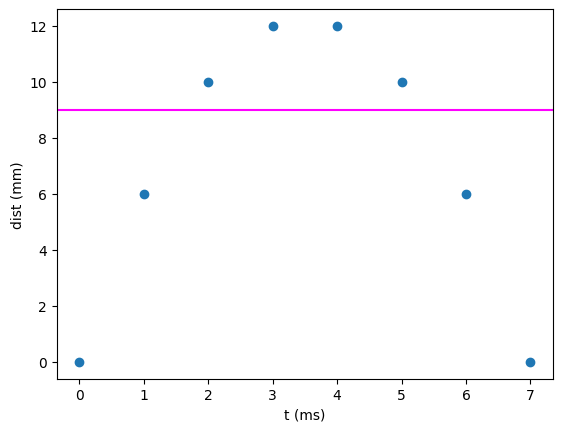

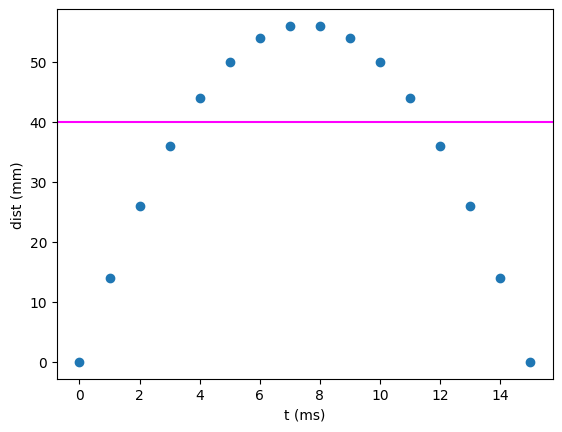

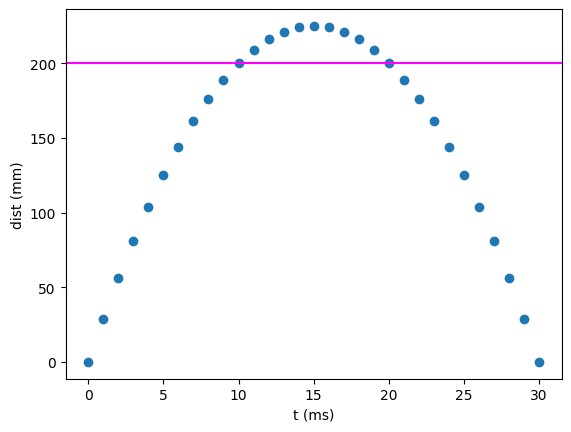

In [21]:
for i, t_tot in enumerate(testtimes):
    tchvec = np.array(range(t_tot + 1))
    xvec = tchvec*(t_tot - tchvec)
    fig, ax = plt.subplots()
    ax.plot(tchvec, xvec, 'o')
    ax.axhline(testdists[i], color='magenta')
    ax.set_xlabel('t (ms)')
    ax.set_ylabel('dist (mm)')
    print((xvec > testdists[i]).sum())

45
19
39
24


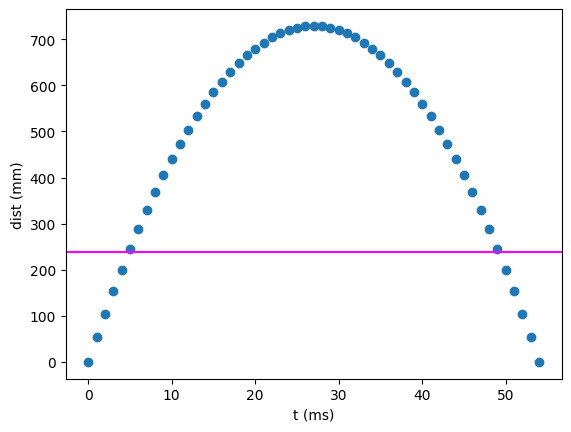

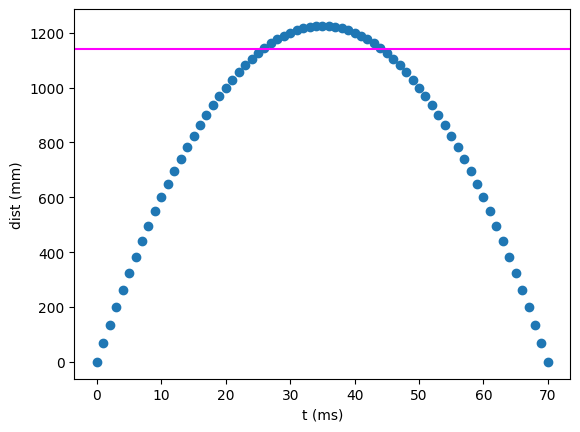

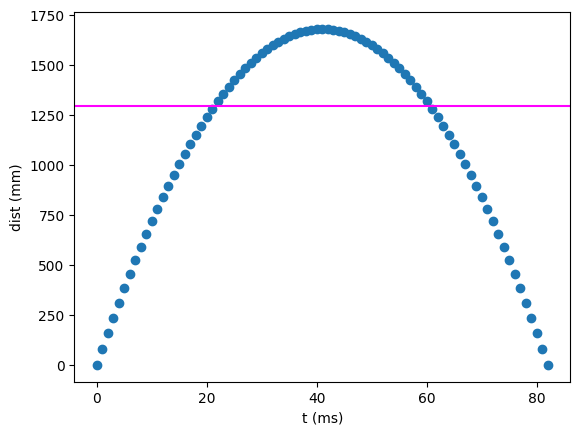

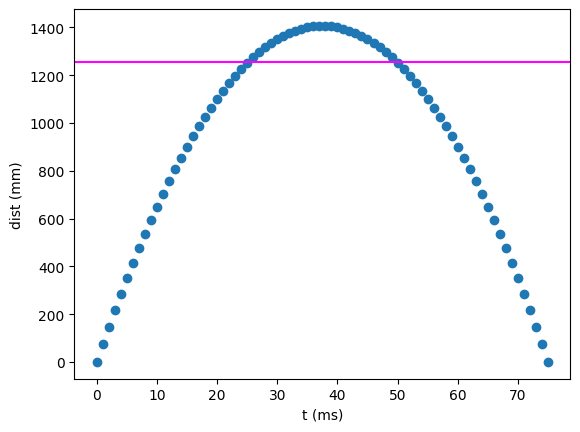

In [23]:
for i, t_tot in enumerate(datatimes):
    tchvec = np.array(range(t_tot + 1))
    xvec = tchvec*(t_tot - tchvec)
    fig, ax = plt.subplots()
    ax.plot(tchvec, xvec, 'o')
    ax.axhline(datadists[i], color='magenta')
    ax.set_xlabel('t (ms)')
    ax.set_ylabel('dist (mm)')
    print((xvec > datadists[i]).sum())

In [25]:
45*19*39*24

800280

## Part 2

Or, just find the roots of $t_{ch}^2 - t_{tot}\cdot t_{ch} + x_{rec} = 0$

In [28]:
coeff = [1, -30, 200]
roots = np.roots(coeff)
roots

array([20., 10.])

In [29]:
int(max(roots) - min(roots))

10

In [31]:
def ints_between_reals(x, y):
    if x > y:
        x, y = y, x
    fx = math.floor(x)
    fy = math.floor(y)
    if fx == fy:
        return 0
    elif y == fy:
        return fy - fx - 1
    else:
        return fy - fx

In [32]:
ints_between_reals(10, 20)

9

In [33]:
# test 
t_tot = 71530
x_rec = 940200
coeff = [1, -t_tot, x_rec]
roots = np.roots(coeff)
roots

array([7.15168534e+04, 1.31465515e+01])

In [35]:
ints_between_reals(*roots)

71503

In [36]:
# data
datainpdf

,t_tot,recdist
0,54,239
1,70,1142
2,82,1295
3,75,1253


In [37]:
t_tot = 54708275
x_rec = 239114212951253
coeff = [1, -t_tot, x_rec]
roots = np.roots(coeff)
roots

array([49918149.23146418,  4790125.76853582])

In [ ]:
ints